# **Data Cleaning Process**
Majority of the explanation of the project is given in the report.

## **Step 1: Creating Main Dataset**
We are combining the datasets into one big dataset. These are extracted from the respective Excel files.

In [1]:
import numpy as np
import pandas as pd

# ignore warnings for cleaner notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the fatal_crashes_2024 dataset
df_fatal_crashes = pd.read_csv("../dataset/bitre_fatal_crashes_dec2024_csv.csv")
df_fatal_crashes.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number Fatalities,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day
0,20241115,NSW,12,2024,Friday,04:00,Single,1,No,No,No,100,Inner Regional Australia,Riverina,Wagga Wagga,Arterial Road,Yes,No,Weekday,Night
1,20241125,NSW,12,2024,Friday,06:15,Single,1,No,No,No,80,Inner Regional Australia,Sydney - Baulkham Hills and Hawkesbury,Hawkesbury,Local Road,No,No,Weekday,Day
2,20246013,Tas,12,2024,Friday,09:43,Multiple,1,No,No,No,50,Inner Regional Australia,Launceston and North East,Northern Midlands,Local Road,Yes,No,Weekday,Day
3,20241002,NSW,12,2024,Friday,10:35,Multiple,1,No,No,No,100,Outer Regional Australia,New England and North West,Armidale Regional,National or State Highway,No,No,Weekday,Day
4,20242261,Vic,12,2024,Friday,11:30,Multiple,1,-9,-9,-9,-9,Unknown,NaN,NaN,Undetermined,No,No,Weekday,Day


In [3]:
# reading the fatalities_2024 dataset
df_fatalities = pd.read_csv("../dataset/bitre_fatalities_dec2024_csv.csv")
df_fatalities = df_fatalities.rename(columns={'Time of day': 'Time of Day'}) # renaming a column
df_fatalities.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of Day
0,20241115,NSW,12,2024,Friday,04:00,Single,No,No,No,...,74,Inner Regional Australia,Riverina,Wagga Wagga,Arterial Road,Yes,No,65_to_74,Weekday,Night
1,20241125,NSW,12,2024,Friday,06:15,Single,No,No,No,...,19,Inner Regional Australia,Sydney - Baulkham Hills and Hawkesbury,Hawkesbury,Local Road,No,No,17_to_25,Weekday,Day
2,20246013,Tas,12,2024,Friday,09:43,Multiple,No,No,No,...,33,Inner Regional Australia,Launceston and North East,Northern Midlands,Local Road,Yes,No,26_to_39,Weekday,Day
3,20241002,NSW,12,2024,Friday,10:35,Multiple,No,No,No,...,32,Outer Regional Australia,New England and North West,Armidale Regional,National or State Highway,No,No,26_to_39,Weekday,Day
4,20242261,Vic,12,2024,Friday,11:30,Multiple,-9,-9,-9,...,62,Unknown,NaN,NaN,Undetermined,No,No,40_to_64,Weekday,Day


Finding common columns and columns unique to first and second dataset

In [4]:
cols_fatal_crashes = set(df_fatal_crashes.columns) # all columns in fatal_crashes dataset
cols_fatalities = set(df_fatalities.columns) # all columns in fatalities dataset
only_fatal_crashes = cols_fatal_crashes - cols_fatalities # columns only found in fatal_crashes
only_fatalities = cols_fatalities - cols_fatal_crashes # columns only found in fatalities
common_cols = cols_fatal_crashes & cols_fatalities # columns found in both

print(only_fatal_crashes)
print(only_fatalities)
print(common_cols)

{'Number Fatalities'}
{'Age', 'Road User', 'Gender', 'Age Group'}
{'National Remoteness Areas', 'Crash Type', 'Dayweek', 'Bus Involvement', 'Day of week', 'Month', 'SA4 Name 2021', 'Year', 'State', 'National Road Type', 'Time of Day', 'Heavy Rigid Truck Involvement', 'Time', 'Speed Limit', 'Crash ID', 'Articulated Truck Involvement', 'Christmas Period', 'Easter Period', 'National LGA Name 2021'}


Combine both datasets on the common columns

In [5]:
df = df_fatalities.merge(df_fatal_crashes, on=list(common_cols), how='left')
df = df.drop_duplicates() # ensure no duplicates when merging
df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of Day,Number Fatalities
0,20241115,NSW,12,2024,Friday,04:00,Single,No,No,No,...,Inner Regional Australia,Riverina,Wagga Wagga,Arterial Road,Yes,No,65_to_74,Weekday,Night,1.0
1,20241125,NSW,12,2024,Friday,06:15,Single,No,No,No,...,Inner Regional Australia,Sydney - Baulkham Hills and Hawkesbury,Hawkesbury,Local Road,No,No,17_to_25,Weekday,Day,1.0
2,20246013,Tas,12,2024,Friday,09:43,Multiple,No,No,No,...,Inner Regional Australia,Launceston and North East,Northern Midlands,Local Road,Yes,No,26_to_39,Weekday,Day,1.0
3,20241002,NSW,12,2024,Friday,10:35,Multiple,No,No,No,...,Outer Regional Australia,New England and North West,Armidale Regional,National or State Highway,No,No,26_to_39,Weekday,Day,1.0
4,20242261,Vic,12,2024,Friday,11:30,Multiple,-9,-9,-9,...,Unknown,NaN,NaN,Undetermined,No,No,40_to_64,Weekday,Day,1.0


In [6]:
df.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'National Remoteness Areas', 'SA4 Name 2021',
       'National LGA Name 2021', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day of week', 'Time of Day',
       'Number Fatalities'],
      dtype='object')

## **Column Handling**
- Name confusion between **Dayweek and Day of Week**

In [7]:
df = df.rename(columns={'Dayweek': 'Day', 'Day of week': 'Day Type'})
df.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Day', 'Time', 'Crash Type',
       'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'National Remoteness Areas', 'SA4 Name 2021',
       'National LGA Name 2021', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day Type', 'Time of Day',
       'Number Fatalities'],
      dtype='object')

In [8]:
# saving the combined dataset (uncleaned) for backup
df.to_csv('../dim_tables/uncleaned_combined_fatalities_2024_backup.csv', index=False)

## **Step 2: Invalid Values Handling**
Handling null values (NaN in datasets)

In [9]:
df.isna().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Day                                  0
Time                                43
Crash Type                           0
Bus Involvement                      0
Heavy Rigid Truck Involvement        0
Articulated Truck Involvement        0
Speed Limit                          0
Road User                            0
Gender                               0
Age                                  0
National Remoteness Areas            0
SA4 Name 2021                    44031
National LGA Name 2021           44029
National Road Type                   0
Christmas Period                     0
Easter Period                        0
Age Group                            0
Day Type                             0
Time of Day                          0
Number Fatalities                 3500
dtype: int64

From column Time, only 43 / 56708. Data can be deleted as they are insignificant.<br>
Deleting all missing values from the columns SA4 Name 2021 and National LGA Name 2021 will remove the majority of the dataset. (40956 / 53364)<br>
Instead, we will be deleting these columns as these columns are not relevant to our data warehouse.

In [10]:
# deleting null values from Time
df = df.dropna(subset=['Time'])

# deleting the columns with unknowns
df = df.drop(columns=['SA4 Name 2021','National LGA Name 2021'])
df

,Crash ID,State,Month,Year,Day,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Gender,Age,National Remoteness Areas,National Road Type,Christmas Period,Easter Period,Age Group,Day Type,Time of Day,Number Fatalities
0,20241115,NSW,12,2024,Friday,04:00,Single,No,No,No,...,Male,74,Inner Regional Australia,Arterial Road,Yes,No,65_to_74,Weekday,Night,1.0
1,20241125,NSW,12,2024,Friday,06:15,Single,No,No,No,...,Female,19,Inner Regional Australia,Local Road,No,No,17_to_25,Weekday,Day,1.0
2,20246013,Tas,12,2024,Friday,09:43,Multiple,No,No,No,...,Female,33,Inner Regional Australia,Local Road,Yes,No,26_to_39,Weekday,Day,1.0
3,20241002,NSW,12,2024,Friday,10:35,Multiple,No,No,No,...,Female,32,Outer Regional Australia,National or State Highway,No,No,26_to_39,Weekday,Day,1.0
4,20242261,Vic,12,2024,Friday,11:30,Multiple,-9,-9,-9,...,Male,62,Unknown,Undetermined,No,No,40_to_64,Weekday,Day,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56868,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,-9,Yes,...,Female,11,Unknown,Undetermined,No,No,0_to_16,Weekday,Night,6.0
56869,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,-9,Yes,...,Female,13,Unknown,Undetermined,No,No,0_to_16,Weekday,Night,6.0
56871,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,-9,Yes,...,Male,18,Unknown,Undetermined,No,No,17_to_25,Weekday,Night,6.0
56872,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,-9,Yes,...,Female,14,Unknown,Undetermined,No,No,0_to_16,Weekday,Night,6.0


### **Number Fatalities**
The data in number fatalities is slightly more significant (3500 / 56665). These nulls are a result of the RIGHT JOIN.<br>
We will try to impute as much as possible from the original dataset.

In [11]:
# Inserting missing values from the original dataset
df['Number Fatalities'] = df['Number Fatalities'].fillna(df['Crash ID'].map(df_fatal_crashes.set_index('Crash ID')['Number Fatalities']))
print(f"Nulls in Number Fatalities: {df['Number Fatalities'].isna().sum()}")

Nulls in Number Fatalities: 0


### **Unknown and Other Values (including -9 handling)**
Step 1: Checking for missing and other values

In [12]:
# checking all unique values in dataset
for col in df.select_dtypes(exclude='number'):
    print(col, df[col].unique())

State ['NSW' 'Tas' 'Vic' 'Qld' 'SA' 'WA' 'ACT' 'NT']
Day ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
Time ['04:00' '06:15' '09:43' ... '03:42' '22:33' '06:57']
Crash Type ['Single' 'Multiple']
Bus Involvement ['No' '-9' 'Yes']
Heavy Rigid Truck Involvement ['No' '-9' 'Yes']
Articulated Truck Involvement ['No' '-9' 'Yes']
Speed Limit ['100' '80' '50' '-9' '90' '60' '70' '110' '40' '20' '10' '5' '130' '30'
 '<40' '25' '15' '75' 70 60 80 100 110 90 -9 50 40 30 20 75]
Road User ['Driver' 'Passenger' 'Motorcycle rider' 'Pedestrian' 'Pedal cyclist'
 'Other/-9' 'Unknown' 'Motorcycle pillion passenger']
Gender ['Male' 'Female' '-9']
National Remoteness Areas ['Inner Regional Australia' 'Outer Regional Australia' 'Unknown'
 'Major Cities of Australia' 'Very Remote Australia' 'Remote Australia']
National Road Type ['Arterial Road' 'Local Road' 'National or State Highway' 'Undetermined'
 'Sub-arterial Road' 'Collector Road' 'Pedestrian Thoroughfare'
 'Access road' 'Bu

### **Handling Speed Limit**
The dataset consists of a mix of integers and strings. <br>
The invalids for speed limit is 1462 / 56665, which is an insignificant amount (2.58%). We can drop these values. <br>
All the data will be converted to strings, and we will group all speed limits below or equal to 40 km/h to '<=40'. <br>

In [13]:
neg_9_count = df[(df['Speed Limit'] == '-9') | (df['Speed Limit'] == -9)]['Crash ID'].count()
all_data_len = df['Crash ID'].count()
print(f"Invalid values in Speed Limit: {neg_9_count}")
print(f"Percentage: {round(neg_9_count / all_data_len * 100, 2)}%")

Invalid values in Speed Limit: 1462
Percentage: 2.58%


In [14]:
df = df[(df['Speed Limit'] != -9) & (df['Speed Limit'] != "-9")] # removing all invalid values (-9)
df['Speed Limit'] = pd.to_numeric(df['Speed Limit'], errors='coerce') # if the value cannot be converted, set to null.
# functiono to replace values to "<40"
df['Speed Limit'] = df['Speed Limit'].apply(lambda x: '<=40' if (x > 0 and x <= 40) else int(x) if pd.notna(x) else x)
df['Speed Limit'] = df['Speed Limit'].fillna('<=40') # the values that cannot be converted are "<40" strings.
df['Speed Limit'] = df['Speed Limit'].astype(str) # ensure datatype consistency
df['Speed Limit'].unique()

array(['100', '80', '50', '90', '60', '70', '110', '<=40', '130', '75'],
      dtype=object)

In [15]:
road_user_invalids = df[(df['Road User'] == 'Other/-9') | (df['Road User'] == 'Unknown')]['Crash ID'].count() # Road User
bus_invalids = df[df['Bus Involvement'] == '-9']['Crash ID'].count() # Bus Involvements
heavy_rigid_invalids = df[df['Heavy Rigid Truck Involvement'] == '-9']['Crash ID'].count() # Heavy Rigid Truck
articulated_invalids = df[df['Articulated Truck Involvement'] == '-9']['Crash ID'].count() # Articulated Truck
gender_invalids = df[df['Gender'] == '-9']['Crash ID'].count() # Gender
age_groups_invalids = df[df['Age Group'] == '-9']['Crash ID'].count() # Age Group
time_of_day_invalids = df[df['Time of Day'] == 'Unknown']['Crash ID'].count() # Time of Day

print(f"Invalid values in Road User: {road_user_invalids}")
print(f"Invalid values in Bus Involvement: {bus_invalids}")
print(f"Invalid values in Heavy Rigid Truck Involvement: {heavy_rigid_invalids}")
print(f"Invalid values in Articulated Truck Involvement: {articulated_invalids}")
print(f"Invalid values in Gender: {gender_invalids}")
print(f"Invalid values in Age Groups: {age_groups_invalids}")
print(f"Invalid values in Time of Day: {time_of_day_invalids}")

Invalid values in Road User: 103
Invalid values in Bus Involvement: 52
Invalid values in Heavy Rigid Truck Involvement: 19625
Invalid values in Articulated Truck Involvement: 46
Invalid values in Gender: 29
Invalid values in Age Groups: 86
Invalid values in Time of Day: 1


In [16]:
remoteness_invalids = df[df['National Remoteness Areas'] == 'Unknown']['Crash ID'].count() # National Remoteness Areas
road_type_invalids = df[df['National Road Type'] == 'Undetermined']['Crash ID'].count() # National Road Type

print(f"Invalid values in National Remoteness Areas: {remoteness_invalids}")
print(f"Invalid values in National Road Type: {road_type_invalids}")

Invalid values in National Remoteness Areas: 43952
Invalid values in National Road Type: 44556


In [17]:
# Calculating percentage of invalid data
all_data_len = df['Crash ID'].count()
total_invalids = road_user_invalids + bus_invalids + + articulated_invalids + gender_invalids + age_groups_invalids + time_of_day_invalids
percentage_invalid = round((total_invalids / all_data_len * 100), 2)
print(f"Total invalid values: {total_invalids}")
print(f"Percentage of invalid: {percentage_invalid}%")

Total invalid values: 317
Percentage of invalid: 0.57%


Heavy Rigid Truck, National Remoteness Areas and National Road Type has too many datasets to be removed. Will be handling separately.<br>
As for the rest, these dataset can be removed. There are 317 invalid data, which only consists 0.57% of the entire dataset.

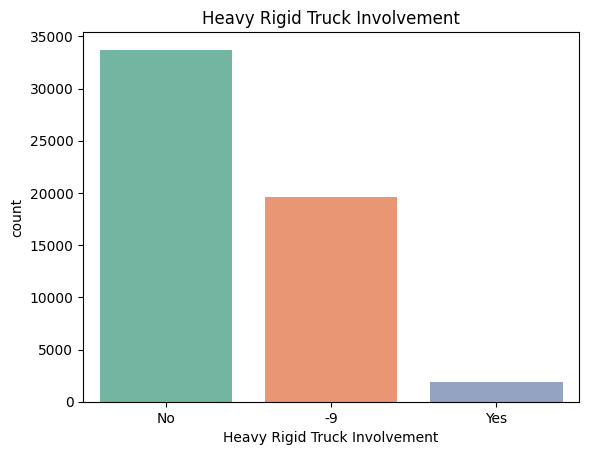

In [18]:
# Showing a countplot of heavy rigid truck involvement
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x = "Heavy Rigid Truck Involvement", palette='Set2')
plt.title("Heavy Rigid Truck Involvement");

Can safely assume that the unknowns in the column "heavy rigid truck" most likely does not involve heavy rigid trucks. <br>
**Handling Process:**
1. Invalid values of "heavy rigid truck" will be replaced with "No", which is also the mode of the column.
2. The 1861 other invalid data will be removed.
3. The column Speed Limit has inconsistent datatype because of the invalid values. Convert the datatype of this column appropriately (to int)
4. Delete the columns National Remoteness Areas and National Road Types for two reasons:
    - These are not relevant to our data warehouse
    - Too many missing values to be handled. Best to delete the columns.

In [19]:
# Imputation of heavy rigid truck
df['Heavy Rigid Truck Involvement'] = df['Heavy Rigid Truck Involvement'].replace('-9', 'No')

# Deleting irrelevant columns
df = df.drop(columns=['National Remoteness Areas','National Road Type'])

# Handling road user
df = df[(df['Road User'] != 'Other/-9') & (df['Road User'] != 'Unknown')]

# Other columns
df = df[~df[['Bus Involvement', 'Articulated Truck Involvement', 'Gender', 'Age Group', 'Time of Day']].isin(["-9","Unknown"]).any(axis=1)]

In [20]:
# Checking if all invalids from categorical data have been removed
categorical_columns = df.select_dtypes(exclude='number') # filter only categorical data
del_cols = ['Time'] # exclude Time because not required in this case

for del_col in del_cols:
    categorical_columns.pop(del_col)

for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

State: ['NSW' 'Tas' 'Qld' 'SA' 'WA' 'Vic' 'ACT' 'NT']
Day: ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
Crash Type: ['Single' 'Multiple']
Bus Involvement: ['No' 'Yes']
Heavy Rigid Truck Involvement: ['No' 'Yes']
Articulated Truck Involvement: ['No' 'Yes']
Speed Limit: ['100' '80' '50' '90' '60' '70' '110' '<=40' '130' '75']
Road User: ['Driver' 'Passenger' 'Motorcycle rider' 'Pedestrian' 'Pedal cyclist'
 'Motorcycle pillion passenger']
Gender: ['Male' 'Female']
Christmas Period: ['Yes' 'No']
Easter Period: ['No' 'Yes']
Age Group: ['65_to_74' '17_to_25' '26_to_39' '40_to_64' '0_to_16' '75_or_older']
Day Type: ['Weekday' 'Weekend']
Time of Day: ['Night' 'Day']


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54939 entries, 0 to 56872
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Crash ID                       54939 non-null  int64  
 1   State                          54939 non-null  object 
 2   Month                          54939 non-null  int64  
 3   Year                           54939 non-null  int64  
 4   Day                            54939 non-null  object 
 5   Time                           54939 non-null  object 
 6   Crash Type                     54939 non-null  object 
 7   Bus Involvement                54939 non-null  object 
 8   Heavy Rigid Truck Involvement  54939 non-null  object 
 9   Articulated Truck Involvement  54939 non-null  object 
 10  Speed Limit                    54939 non-null  object 
 11  Road User                      54939 non-null  object 
 12  Gender                         54939 non-null  obje

Data is ready for warehousing and analysis purposes.

In [22]:
df.to_csv('../dim_tables/cleaned_combined_fatalities_2024.csv', index=False)

# **Step 3: Fact and Dimension Tables**

In [23]:
# Final dataset
print(df.columns)
df

Index(['Crash ID', 'State', 'Month', 'Year', 'Day', 'Time', 'Crash Type',
       'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'Christmas Period', 'Easter Period', 'Age Group', 'Day Type',
       'Time of Day', 'Number Fatalities'],
      dtype='object')


,Crash ID,State,Month,Year,Day,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day Type,Time of Day,Number Fatalities
0,20241115,NSW,12,2024,Friday,04:00,Single,No,No,No,100,Driver,Male,74,Yes,No,65_to_74,Weekday,Night,1.0
1,20241125,NSW,12,2024,Friday,06:15,Single,No,No,No,80,Driver,Female,19,No,No,17_to_25,Weekday,Day,1.0
2,20246013,Tas,12,2024,Friday,09:43,Multiple,No,No,No,50,Driver,Female,33,Yes,No,26_to_39,Weekday,Day,1.0
3,20241002,NSW,12,2024,Friday,10:35,Multiple,No,No,No,100,Driver,Female,32,No,No,26_to_39,Weekday,Day,1.0
5,20243185,Qld,12,2024,Friday,13:00,Multiple,No,No,No,100,Passenger,Female,61,No,No,40_to_64,Weekday,Day,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56867,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,No,Yes,100,Passenger,Male,13,No,No,0_to_16,Weekday,Night,6.0
56868,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,No,Yes,100,Passenger,Female,11,No,No,0_to_16,Weekday,Night,6.0
56869,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,No,Yes,100,Passenger,Female,13,No,No,0_to_16,Weekday,Night,6.0
56871,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,No,Yes,100,Driver,Male,18,No,No,17_to_25,Weekday,Night,6.0


In [24]:
# date dimension
dim_date = df[['Month','Year','Day','Day Type','Christmas Period','Easter Period']].drop_duplicates().reset_index(drop=True)
dim_date['Date_ID'] = dim_date.index + 1 # creating ID
dim_date = dim_date[[dim_date.columns[-1]] + dim_date.columns[:-1].tolist()] # moving ID to first col
print(dim_date)
dim_date.to_csv('../dim_tables/dim_date.csv', index=False)

# fact table for date
fact_df = df.merge(dim_date, how='left', on=['Month','Year','Day','Day Type','Christmas Period','Easter Period'])
fact_df = fact_df.drop(columns=['Month','Year','Day','Day Type','Christmas Period','Easter Period'])
fact_df

      Date_ID  Month  Year        Day Day Type Christmas Period Easter Period
0           1     12  2024     Friday  Weekday              Yes            No
1           2     12  2024     Friday  Weekday               No            No
2           3     12  2024     Friday  Weekend               No            No
3           4     12  2024     Monday  Weekend               No            No
4           5     12  2024     Monday  Weekday               No            No
...       ...    ...   ...        ...      ...              ...           ...
4284     4285      1  1989     Sunday  Weekend              Yes            No
4285     4286      1  1989   Thursday  Weekday               No            No
4286     4287      1  1989    Tuesday  Weekday               No            No
4287     4288      1  1989    Tuesday  Weekday              Yes            No
4288     4289      1  1989  Wednesday  Weekday               No            No

[4289 rows x 7 columns]


,Crash ID,State,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Age Group,Time of Day,Number Fatalities,Date_ID
0,20241115,NSW,04:00,Single,No,No,No,100,Driver,Male,74,65_to_74,Night,1.0,1
1,20241125,NSW,06:15,Single,No,No,No,80,Driver,Female,19,17_to_25,Day,1.0,2
2,20246013,Tas,09:43,Multiple,No,No,No,50,Driver,Female,33,26_to_39,Day,1.0,1
3,20241002,NSW,10:35,Multiple,No,No,No,100,Driver,Female,32,26_to_39,Day,1.0,2
4,20243185,Qld,13:00,Multiple,No,No,No,100,Passenger,Female,61,40_to_64,Day,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54934,19896006,Tas,20:20,Multiple,No,No,Yes,100,Passenger,Male,13,0_to_16,Night,6.0,4289
54935,19896006,Tas,20:20,Multiple,No,No,Yes,100,Passenger,Female,11,0_to_16,Night,6.0,4289
54936,19896006,Tas,20:20,Multiple,No,No,Yes,100,Passenger,Female,13,0_to_16,Night,6.0,4289
54937,19896006,Tas,20:20,Multiple,No,No,Yes,100,Driver,Male,18,17_to_25,Night,6.0,4289


In [25]:
# time dimension
dim_time = df[['Time','Time of Day']].drop_duplicates().reset_index(drop=True)
dim_time['Time_ID'] = dim_time.index + 1 # creating ID
dim_time = dim_time[[dim_time.columns[-1]] + dim_time.columns[:-1].tolist()] # moving ID to first col
print(dim_time)
dim_time.to_csv('../dim_tables/dim_time.csv', index=False)

# fact table for time
fact_df = fact_df.merge(dim_time, how='left', on=['Time','Time of Day'])
fact_df = fact_df.drop(columns=['Time','Time of Day'])
fact_df

      Time_ID   Time Time of Day
0           1  04:00       Night
1           2  06:15         Day
2           3  09:43         Day
3           4  10:35         Day
4           5  13:00         Day
...       ...    ...         ...
1523     1524  08:54         Day
1524     1525  03:42       Night
1525     1526  22:33       Night
1526     1527  09:42         Day
1527     1528  06:57         Day

[1528 rows x 3 columns]


,Crash ID,State,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Age Group,Number Fatalities,Date_ID,Time_ID
0,20241115,NSW,Single,No,No,No,100,Driver,Male,74,65_to_74,1.0,1,1
1,20241125,NSW,Single,No,No,No,80,Driver,Female,19,17_to_25,1.0,2,2
2,20246013,Tas,Multiple,No,No,No,50,Driver,Female,33,26_to_39,1.0,1,3
3,20241002,NSW,Multiple,No,No,No,100,Driver,Female,32,26_to_39,1.0,2,4
4,20243185,Qld,Multiple,No,No,No,100,Passenger,Female,61,40_to_64,1.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54934,19896006,Tas,Multiple,No,No,Yes,100,Passenger,Male,13,0_to_16,6.0,4289,175
54935,19896006,Tas,Multiple,No,No,Yes,100,Passenger,Female,11,0_to_16,6.0,4289,175
54936,19896006,Tas,Multiple,No,No,Yes,100,Passenger,Female,13,0_to_16,6.0,4289,175
54937,19896006,Tas,Multiple,No,No,Yes,100,Driver,Male,18,17_to_25,6.0,4289,175


In [26]:
# location dimension
dim_location = df[['State']].drop_duplicates().reset_index(drop=True)
dim_location['Location_ID'] = dim_location.index + 1 # creating ID
dim_location = dim_location[[dim_location.columns[-1]] + dim_location.columns[:-1].tolist()] # moving ID to first col
print(dim_location)
dim_location.to_csv('../dim_tables/dim_location.csv', index=False)

# fact table for location
fact_df = fact_df.merge(dim_location, how='left', on=['State'])
fact_df = fact_df.drop(columns=['State'])
fact_df

   Location_ID State
0            1   NSW
1            2   Tas
2            3   Qld
3            4    SA
4            5    WA
5            6   Vic
6            7   ACT
7            8    NT


,Crash ID,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Age Group,Number Fatalities,Date_ID,Time_ID,Location_ID
0,20241115,Single,No,No,No,100,Driver,Male,74,65_to_74,1.0,1,1,1
1,20241125,Single,No,No,No,80,Driver,Female,19,17_to_25,1.0,2,2,1
2,20246013,Multiple,No,No,No,50,Driver,Female,33,26_to_39,1.0,1,3,2
3,20241002,Multiple,No,No,No,100,Driver,Female,32,26_to_39,1.0,2,4,1
4,20243185,Multiple,No,No,No,100,Passenger,Female,61,40_to_64,1.0,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54934,19896006,Multiple,No,No,Yes,100,Passenger,Male,13,0_to_16,6.0,4289,175,2
54935,19896006,Multiple,No,No,Yes,100,Passenger,Female,11,0_to_16,6.0,4289,175,2
54936,19896006,Multiple,No,No,Yes,100,Passenger,Female,13,0_to_16,6.0,4289,175,2
54937,19896006,Multiple,No,No,Yes,100,Driver,Male,18,17_to_25,6.0,4289,175,2


In [27]:
# vehicle dimension
dim_vehicle = df[['Bus Involvement','Heavy Rigid Truck Involvement', 'Articulated Truck Involvement']].drop_duplicates().reset_index(drop=True)
dim_vehicle['Vehicle_ID'] = dim_vehicle.index + 1 # creating ID
dim_vehicle = dim_vehicle[[dim_vehicle.columns[-1]] + dim_vehicle.columns[:-1].tolist()] # moving ID to first col
print(dim_vehicle)
dim_vehicle.to_csv('../dim_tables/dim_vehicle.csv', index=False)

# fact table for vehicles
fact_df = fact_df.merge(dim_vehicle, how='left', on=['Bus Involvement','Heavy Rigid Truck Involvement', 'Articulated Truck Involvement'])
fact_df = fact_df.drop(columns=['Bus Involvement','Heavy Rigid Truck Involvement', 'Articulated Truck Involvement'])
fact_df

   Vehicle_ID Bus Involvement Heavy Rigid Truck Involvement  \
0           1              No                            No   
1           2              No                            No   
2           3             Yes                            No   
3           4              No                           Yes   
4           5              No                           Yes   
5           6             Yes                            No   
6           7             Yes                           Yes   

  Articulated Truck Involvement  
0                            No  
1                           Yes  
2                           Yes  
3                            No  
4                           Yes  
5                            No  
6                            No  


,Crash ID,Crash Type,Speed Limit,Road User,Gender,Age,Age Group,Number Fatalities,Date_ID,Time_ID,Location_ID,Vehicle_ID
0,20241115,Single,100,Driver,Male,74,65_to_74,1.0,1,1,1,1
1,20241125,Single,80,Driver,Female,19,17_to_25,1.0,2,2,1,1
2,20246013,Multiple,50,Driver,Female,33,26_to_39,1.0,1,3,2,1
3,20241002,Multiple,100,Driver,Female,32,26_to_39,1.0,2,4,1,1
4,20243185,Multiple,100,Passenger,Female,61,40_to_64,1.0,2,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
54934,19896006,Multiple,100,Passenger,Male,13,0_to_16,6.0,4289,175,2,2
54935,19896006,Multiple,100,Passenger,Female,11,0_to_16,6.0,4289,175,2,2
54936,19896006,Multiple,100,Passenger,Female,13,0_to_16,6.0,4289,175,2,2
54937,19896006,Multiple,100,Driver,Male,18,17_to_25,6.0,4289,175,2,2


In [28]:
# speed limit dimension
dim_speedlimit = df[['Speed Limit']].drop_duplicates().sort_values(by='Speed Limit', ascending=False).reset_index(drop=True)
dim_speedlimit['Speed_ID'] = dim_speedlimit.index + 1 # creating ID
dim_speedlimit = dim_speedlimit[[dim_speedlimit.columns[-1]] + dim_speedlimit.columns[:-1].tolist()] # moving ID to first col
print(dim_speedlimit)
dim_speedlimit.to_csv('../dim_tables/dim_speedlimit.csv', index=False)

# fact table for vehicles
fact_df = fact_df.merge(dim_speedlimit, how='left', on=['Speed Limit'])
fact_df = fact_df.drop(columns=['Speed Limit'])
fact_df

   Speed_ID Speed Limit
0         1        <=40
1         2          90
2         3          80
3         4          75
4         5          70
5         6          60
6         7          50
7         8         130
8         9         110
9        10         100


,Crash ID,Crash Type,Road User,Gender,Age,Age Group,Number Fatalities,Date_ID,Time_ID,Location_ID,Vehicle_ID,Speed_ID
0,20241115,Single,Driver,Male,74,65_to_74,1.0,1,1,1,1,10
1,20241125,Single,Driver,Female,19,17_to_25,1.0,2,2,1,1,3
2,20246013,Multiple,Driver,Female,33,26_to_39,1.0,1,3,2,1,7
3,20241002,Multiple,Driver,Female,32,26_to_39,1.0,2,4,1,1,10
4,20243185,Multiple,Passenger,Female,61,40_to_64,1.0,2,5,3,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
54934,19896006,Multiple,Passenger,Male,13,0_to_16,6.0,4289,175,2,2,10
54935,19896006,Multiple,Passenger,Female,11,0_to_16,6.0,4289,175,2,2,10
54936,19896006,Multiple,Passenger,Female,13,0_to_16,6.0,4289,175,2,2,10
54937,19896006,Multiple,Driver,Male,18,17_to_25,6.0,4289,175,2,2,10


In [29]:
# gender dimension
dim_gender = df[['Gender']].drop_duplicates().reset_index(drop=True)
dim_gender['Gender_ID'] = dim_gender.index + 1 # creating ID
dim_gender = dim_gender[[dim_gender.columns[-1]] + dim_gender.columns[:-1].tolist()] # moving ID to first col
print(dim_gender)
dim_gender.to_csv('../dim_tables/dim_gender.csv', index=False)

# fact table for vehicles
fact_df = fact_df.merge(dim_gender, how='left', on=['Gender'])
fact_df = fact_df.drop(columns=['Gender'])
fact_df

   Gender_ID  Gender
0          1    Male
1          2  Female


,Crash ID,Crash Type,Road User,Age,Age Group,Number Fatalities,Date_ID,Time_ID,Location_ID,Vehicle_ID,Speed_ID,Gender_ID
0,20241115,Single,Driver,74,65_to_74,1.0,1,1,1,1,10,1
1,20241125,Single,Driver,19,17_to_25,1.0,2,2,1,1,3,2
2,20246013,Multiple,Driver,33,26_to_39,1.0,1,3,2,1,7,2
3,20241002,Multiple,Driver,32,26_to_39,1.0,2,4,1,1,10,2
4,20243185,Multiple,Passenger,61,40_to_64,1.0,2,5,3,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...
54934,19896006,Multiple,Passenger,13,0_to_16,6.0,4289,175,2,2,10,1
54935,19896006,Multiple,Passenger,11,0_to_16,6.0,4289,175,2,2,10,2
54936,19896006,Multiple,Passenger,13,0_to_16,6.0,4289,175,2,2,10,2
54937,19896006,Multiple,Driver,18,17_to_25,6.0,4289,175,2,2,10,1


In [30]:
# age dimension
dim_age = df[['Age','Age Group']].drop_duplicates().reset_index(drop=True)
dim_age['Age_ID'] = dim_age.index + 1 # creating ID
dim_age = dim_age[[dim_age.columns[-1]] + dim_age.columns[:-1].tolist()] # moving ID to first col
print(dim_age)
dim_age.to_csv('../dim_tables/dim_age.csv', index=False)

# fact table for vehicles
fact_df = fact_df.merge(dim_age, how='left', on=['Age','Age Group'])
fact_df = fact_df.drop(columns=['Age','Age Group'])
fact_df

     Age_ID  Age    Age Group
0         1   74     65_to_74
1         2   19     17_to_25
2         3   33     26_to_39
3         4   32     26_to_39
4         5   61     40_to_64
..      ...  ...          ...
97       98   10      0_to_16
98       99   99  75_or_older
99      100   95  75_or_older
100     101   98  75_or_older
101     102  101  75_or_older

[102 rows x 3 columns]


,Crash ID,Crash Type,Road User,Number Fatalities,Date_ID,Time_ID,Location_ID,Vehicle_ID,Speed_ID,Gender_ID,Age_ID
0,20241115,Single,Driver,1.0,1,1,1,1,10,1,1
1,20241125,Single,Driver,1.0,2,2,1,1,3,2,2
2,20246013,Multiple,Driver,1.0,1,3,2,1,7,2,3
3,20241002,Multiple,Driver,1.0,2,4,1,1,10,2,4
4,20243185,Multiple,Passenger,1.0,2,5,3,1,10,2,5
...,...,...,...,...,...,...,...,...,...,...,...
54934,19896006,Multiple,Passenger,6.0,4289,175,2,2,10,1,74
54935,19896006,Multiple,Passenger,6.0,4289,175,2,2,10,2,77
54936,19896006,Multiple,Passenger,6.0,4289,175,2,2,10,2,74
54937,19896006,Multiple,Driver,6.0,4289,175,2,2,10,1,48


In [31]:
# road user dimension
dim_road_user = df[['Road User']].drop_duplicates().reset_index(drop=True)
dim_road_user['Road_User_ID'] = dim_road_user.index + 1 # creating ID
dim_road_user = dim_road_user[[dim_road_user.columns[-1]] + dim_road_user.columns[:-1].tolist()] # moving ID to first col
print(dim_road_user)
dim_road_user.to_csv('../dim_tables/dim_road_user.csv', index=False)

# fact table for vehicles
fact_df = fact_df.merge(dim_road_user, how='left', on=['Road User'])
fact_df = fact_df.drop(columns=['Road User'])
fact_df

   Road_User_ID                     Road User
0             1                        Driver
1             2                     Passenger
2             3              Motorcycle rider
3             4                    Pedestrian
4             5                 Pedal cyclist
5             6  Motorcycle pillion passenger


,Crash ID,Crash Type,Number Fatalities,Date_ID,Time_ID,Location_ID,Vehicle_ID,Speed_ID,Gender_ID,Age_ID,Road_User_ID
0,20241115,Single,1.0,1,1,1,1,10,1,1,1
1,20241125,Single,1.0,2,2,1,1,3,2,2,1
2,20246013,Multiple,1.0,1,3,2,1,7,2,3,1
3,20241002,Multiple,1.0,2,4,1,1,10,2,4,1
4,20243185,Multiple,1.0,2,5,3,1,10,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...
54934,19896006,Multiple,6.0,4289,175,2,2,10,1,74,2
54935,19896006,Multiple,6.0,4289,175,2,2,10,2,77,2
54936,19896006,Multiple,6.0,4289,175,2,2,10,2,74,2
54937,19896006,Multiple,6.0,4289,175,2,2,10,1,48,1


In [32]:
# crash type dimension
dim_crashtype = df[['Crash Type']].drop_duplicates().reset_index(drop=True)
dim_crashtype['Crashtype_ID'] = dim_crashtype.index + 1 # creating ID
dim_crashtype = dim_crashtype[[dim_crashtype.columns[-1]] + dim_crashtype.columns[:-1].tolist()] # moving ID to first col
print(dim_crashtype)
dim_crashtype.to_csv('../dim_tables/dim_crashtype.csv', index=False)

# fact table for vehicles
fact_df = fact_df.merge(dim_crashtype, how='left', on=['Crash Type'])
fact_df = fact_df.drop(columns=['Crash Type'])
fact_df

   Crashtype_ID Crash Type
0             1     Single
1             2   Multiple


,Crash ID,Number Fatalities,Date_ID,Time_ID,Location_ID,Vehicle_ID,Speed_ID,Gender_ID,Age_ID,Road_User_ID,Crashtype_ID
0,20241115,1.0,1,1,1,1,10,1,1,1,1
1,20241125,1.0,2,2,1,1,3,2,2,1,1
2,20246013,1.0,1,3,2,1,7,2,3,1,2
3,20241002,1.0,2,4,1,1,10,2,4,1,2
4,20243185,1.0,2,5,3,1,10,2,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...
54934,19896006,6.0,4289,175,2,2,10,1,74,2,2
54935,19896006,6.0,4289,175,2,2,10,2,77,2,2
54936,19896006,6.0,4289,175,2,2,10,2,74,2,2
54937,19896006,6.0,4289,175,2,2,10,1,48,1,2


In [33]:
# finalising the fact table
fact_df = fact_df.drop(columns='Crash ID') # drop original crash ID
fact_df = fact_df[fact_df.columns[1:].tolist() + [fact_df.columns[0]]] # fact moved to last column
fact_df = fact_df.rename(columns={'Number Fatalities':'Fatalities'})
fact_df['Crash_ID'] = fact_df.index + 1
fact_df = fact_df[[fact_df.columns[-1]] + fact_df.columns[:-1].tolist()] # crashID moved to first column
fact_df['Fatalities'] = fact_df['Fatalities'].astype(int)
fact_df.to_csv('../dim_tables/fatalities_fact.csv', index=False)
fact_df

,Crash_ID,Date_ID,Time_ID,Location_ID,Vehicle_ID,Speed_ID,Gender_ID,Age_ID,Road_User_ID,Crashtype_ID,Fatalities
0,1,1,1,1,1,10,1,1,1,1,1
1,2,2,2,1,1,3,2,2,1,1,1
2,3,1,3,2,1,7,2,3,1,2,1
3,4,2,4,1,1,10,2,4,1,2,1
4,5,2,5,3,1,10,2,5,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
54934,54935,4289,175,2,2,10,1,74,2,2,6
54935,54936,4289,175,2,2,10,2,77,2,2,6
54936,54937,4289,175,2,2,10,2,74,2,2,6
54937,54938,4289,175,2,2,10,1,48,1,2,6
